# Lab 2: Exploratory Data Analysis (EDA) with Synthetic ABCD Opioid Use Data
**Learning Objectives**

By the end of this lab, you will be able to:

1. **Summarize numeric variables** using key descriptive statistics (median, IQR, percent missing) and visualizations (histograms, boxplots).
2. **Summarize categorical variables** using frequency tables, proportions, and bar plots.
3. **Explore relationships between variables** by:
   - Comparing two categorical variables
   - Comparing a categorical variable with a numeric variable
   - Comparing two numeric variables
4. **Apply helper functions** to:
   - Standardize and handle special missing codes
   - Generate consistent summaries for numeric and categorical variables
5. **Interpret EDA results** in plain language, connecting statistical patterns to the research context.

> Note: All work in this lab is **exploratory**. You will not clean or transform data until **Lab 3**.


**Grading Note:**  
Complete all sections of this notebook, then **save it as `Lab2.ipynb`** before submission.  
If you are working in VS Code/Codespaces, use **File → Download** to save the `.ipynb` file to your local machine.  
Refer to the **Autograder Checklist & Grade Rubric** at the end of this notebook to make sure your work meets all requirements.


## About the Sample & Dataset

This lab uses a **synthetic ABCD-like dataset** of **young adults age ~20 (N ≈ 11,680)**. It combines self-report survey measures with a limited set of hair toxicology results to practice EDA and, later, data cleaning.

**What’s inside (high level):**
- **Opioid use history & patterns:** lifetime and past-year nonmedical use; ages of onset/regular use; days since last use; lifetime pill counts; largest single-sitting amount; specific products (e.g., hydrocodone, oxycodone, codeine, morphine) and **routes** (oral, intranasal, smoking/vaping).
- **Problems & risk:** **DAPI** summary score (0–72), **parental monitoring** mean, **peer deviance** items (PGD 001–008), perceived harm, peer approval, and opportunity to use.
- **Hair toxicology (subset ~20%)**: opiate **screen** (positive/negative/QNS) plus **confirm** and **quantitation** targets for several analytes.

#### **Variable Look-Up:** Remember to look up variables in the ABCD Data Dictionary for data structures and coding schemes: https://abcd.deapscience.com/#/my-datasets/create-dataset

**Coding & missingness to expect:**
- Binary variables typically use **0 = No, 1 = Yes**; ordinal items follow documented scales (e.g., 0–4).
- **Special nonresponse codes** appear in some fields (e.g., **666 = QNS**, **777 = Refused**, **999 = Don’t know**).
- **NaN** often indicates **gating/skip logic** (question not asked) or non-tested toxicology rows.

> We will treat special codes transparently during EDA and address recoding/cleaning decisions in the next lab.



## Setup

Run the following cell to import the necessary libraries and load the dataset.

### What this setup code does

- Imports three libraries:
  - pandas (pd) for working with tables of data
  - numpy (np) for numeric operations
  - matplotlib.pyplot (plt) for plotting
- A pandas DataFrame is a table: rows are observations (people/records) and columns are variables (features). `df` is the DataFrame loaded from the CSV file.
- `pd.set_option('display.max_columns', None)` tells pandas to show all columns when printing tables.
- `pd.read_csv('L2L3dataset.csv')` reads the dataset into `df`.
- `df.shape` shows how many rows and columns are in the data, and we print that.
- `df.head()` displays the first 5 rows so you can quickly


In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Configure display options
pd.set_option('display.max_columns', None)

df = pd.read_csv('L2L3dataset.csv')

# Display the shape of the dataset and the first few rows
df_shape = df.shape
print(f"Dataset contains {df_shape[0]} rows and {df_shape[1]} columns.")
df.head()


Dataset contains 11680 rows and 46 columns.


,src_subject_id,su_y_sui__use__rxopi_001,su_y_sui__use__rxopi_001__l,su_y_sui__rxopi__last__day_count,su_y_sui__rxopi__lt_001,su_y_sui__rxopi__max_001,su_y_sui__rxopi__onset_useage,su_y_sui__rxopi__reg_001,su_y_sui__rxopi__reg_useage,su_y_sui__rxopi__fwup_001___1,su_y_sui__rxopi__fwup_001___4,su_y_sui__rxopi__fwup_001___5,su_y_sui__rxopi__fwup_001___3,su_y_sui__rxopi__fwup_002___2,su_y_sui__rxopi__fwup_002___3,su_y_sui__rxopi__fwup_002___1,su_y_sui__rxopi__fwup_002___8,su_y_hairtox__coll_002,su_y_hairtox__lab_len,su_y_hairtox__lab_weight,su_y_hairtox__rslt__opi_scrn,su_y_hairtox__rslt__opi__hc_cnf,su_y_hairtox__rslt__opi__hc_qnt,su_y_hairtox__rslt__opi__oc_cnf,su_y_hairtox__rslt__opi__oc_qnt,su_y_hairtox__rslt__opi__cod_cnf,su_y_hairtox__rslt__opi__cod_qnt,su_y_hairtox__rslt__opi__mor_cnf,su_y_hairtox__rslt__opi__mor_qnt,su_y_drgprob_prsum,su_y_perc__rxopi_001,su_y_ptu__rxopi_001,su_y_otu__rxopi_001,fc_y_pbp_001,fc_y_pbp_002,fc_y_pbp_003,fc_y_pm_mean,su_y_pgd_001,su_y_pgd_002,su_y_pgd_003,su_y_pgd_004,su_y_pgd_005,su_y_pgd_006,su_y_pgd_007,su_y_pgd_008,su_y_pgd_009
0,10000,1.0,0.0,NaN,6.0,32.876867,14.867057,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,0,0,1.0,1.0,2.0,1.907978,0.0,0.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0
1,10001,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,2,0,1.0,1.0,1.0,5.000000,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0
2,10002,1.0,0.0,NaN,4.0,57.209321,16.014023,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,1,0,2.0,5.0,3.0,3.224402,0.0,4.0,4.0,0.0,3.0,1.0,2.0,1.0,NaN
3,10003,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,1,0,1.0,1.0,1.0,3.821480,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10004,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3,2,0,4.0,1.0,1.0,3.925050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### (Optional but Recommended) Explore the Dataset with Data Wrangler

Data Wrangler offers a user-friendly interface for viewing and cleaning your data. Here’s how to launch and use it directly within your notebook:

1. **Open Data Wrangler from the Notebook:**  
   - Ensure that your dataset is loaded as a Pandas DataFrame (e.g., `df`).
   - In the Jupyter > Variables panel (usually located in the right sidebar), locate the variable `df`.
   - Click the **Open 'df' in Data Wrangler** button next to the variable name.

2. **Explore Data in Viewing Mode:**  
   - Data Wrangler will open in Viewing Mode by default.
   - Use this mode to quickly inspect your data, view summary statistics, and identify any obvious issues like missing values or outliers.


In [3]:
from pathlib import Path

# Figure dir + robust savefig helper (works with or without extension or path)
IMG_DIR = Path("figures")
IMG_DIR.mkdir(exist_ok=True)

def savefig(path, dpi=150, tight=True):
    """
    Save current Matplotlib figure.
    Examples:
      savefig("03_demo_cat_bar")
      savefig("figures/03_demo_cat_bar.png")
    """
    p = Path(path)
    if p.suffix == "":
        p = p.with_suffix(".png")
    if p.parent == Path("."):
        p = IMG_DIR / p  # default to ./figures/
    p.parent.mkdir(parents=True, exist_ok=True)
    plt.savefig(p, dpi=dpi, bbox_inches="tight" if tight else None)

## 1. Univariate EDA: Numeric variable (Demo)

We'll start by examining a quantitative variable.  In this example we use the **DAPI sum** (`su_y_drgprob_prsum`).  The code below calculates the median, interquartile range (IQR), and percent missing.  It then visualizes the distribution with a histogram and a boxplot.  When you run the cell, look at the histogram shape and the boxplot for signs of skewness or outliers.


Mean: 0.7441720430107527
Median: 0.0
Q1 (25th percentile): 0.0
Q3 (75th percentile): 1.0
IQR (Q3 - Q1): 1.0
Percent missing: 0.47%
Min: 0.0
Max: 33.0


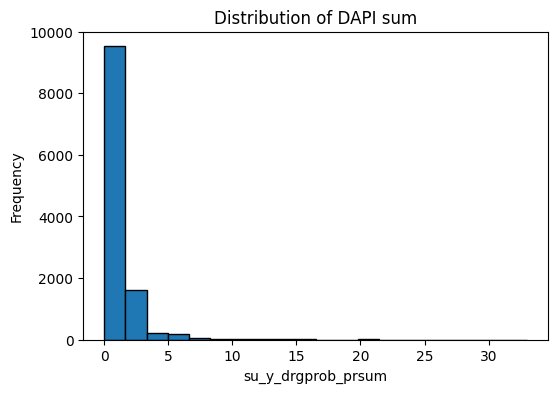

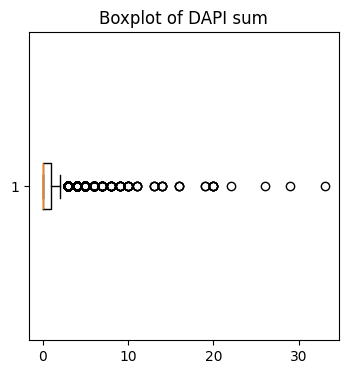

In [4]:
# Select the numeric variable
dapi_var = 'su_y_drgprob_prsum'
dapi = df[dapi_var]

# Summary statistics
mean = dapi.mean()
median = dapi.median()
q1 = dapi.quantile(0.25)
q3 = dapi.quantile(0.75)
iqr = q3 - q1
pct_missing = dapi.isna().mean() * 100
min_val = dapi.min()
max_val = dapi.max()

print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR (Q3 - Q1): {iqr}")
print(f"Percent missing: {pct_missing:.2f}%")
print(f"Min: {min_val}")
print(f"Max: {max_val}")

# Histogram
plt.figure(figsize=(6,4))
plt.hist(dapi.dropna(), bins=20, edgecolor='black')
plt.title('Distribution of DAPI sum')
plt.xlabel(dapi_var)
plt.ylabel('Frequency')
savefig("q1_dapi_hist")
plt.show()

# Boxplot
plt.figure(figsize=(4,4))
plt.boxplot(dapi.dropna(), vert=False)
plt.title('Boxplot of DAPI sum')
savefig("q1_dapi_box")
plt.show()


**Reflection:**

- Describe the shape of the DAPI sum distribution.  Does it look symmetric, skewed, or something else?
- Are there any obvious outliers?  How might those affect later analyses?
- What percent of cases have missing values for this variable?

Use the bullet points above to jot down your observations in the cell below.


## 2. Your turn: Univariate EDA — Quantitative

Pick one approved numeric variable from the list below and compute:

- **Median**
- **IQR (Q3 − Q1)**
- **Percent missing**

Then make a histogram and a boxplot.  
Treat special codes `777` and `999` as missing by replacing them with `np.nan` first.

### Approved quantitative variables
- `su_y_sui__rxopi__onset_useage` – Age at first opioid use
- `su_y_sui__rxopi__lt_001` – Number of opioid use days (past 6 months)
- `fc_y_pm_mean` – Parental monitoring mean

### Copilot prompts for further understanding (paste one at a time):
1. “Show how to compute median, IQR (Q3−Q1), and percent missing for a pandas Series; treat 777 and 999 as NaN without changing the original DataFrame.”
2. “Given a numeric pandas Series, provide minimal code to plot a histogram and a horizontal boxplot

Variable: su_y_sui__rxopi__onset_useage
Mean: 15.45755433336187
Variable: su_y_sui__rxopi__onset_useage
Mean: 15.45755433336187
Median: 15.456957204125533
Q1 (25th percentile): 14.53324216918165
Q3 (75th percentile): 16.34962930112663
IQR (Q3 - Q1): 1.81638713194498
Percent missing: 89.69%
Min: 11.292798898785149
Max: 19.926244027347167


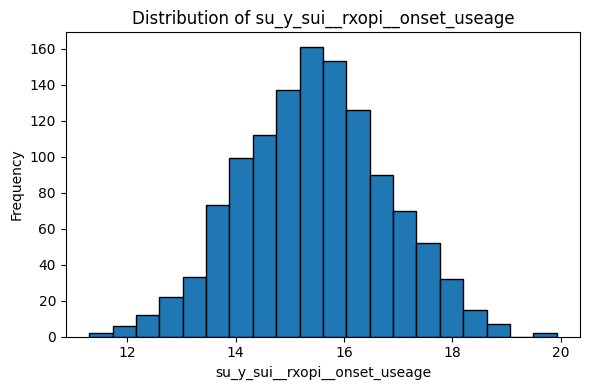

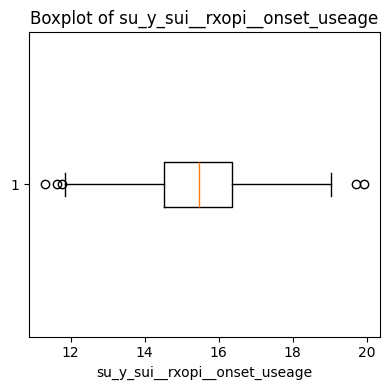

In [5]:
# Select your numeric variable
quant_var = 'su_y_sui__rxopi__onset_useage'  # TODO: choose from the approved list above
series = df[quant_var].replace({777: np.nan, 999: np.nan})  # Replace special missing codes with NaN

# Summary statistics
# Summary statistics
mean = series.mean() # TODO
median = series.median() # TODO
q1 = series.quantile(0.25) # TODO (0.25)
q3 = series.quantile(0.75) # TODO
iqr = q3 - q1
pct_missing = (series.isna().sum() / len(series)) * 100 # TODO
min_val = series.min() # TODO
max_val = series.max() # TODO

print(f"Variable: {quant_var}")
print(f"Mean: {mean}")
median = series.median() # TODO
q1 = series.quantile(0.25) # TODO (0.25)
q3 = series.quantile(0.75) # TODO
iqr = q3 - q1
pct_missing = series.isna().sum() / len(series) * 100 # TODO
min_val = series.min() # TODO
max_val = series.max() # TODO

print(f"Variable: {quant_var}")
print(f"Mean: {mean}")
print(f"Median: {median}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR (Q3 - Q1): {iqr}")
print(f"Percent missing: {pct_missing:.2f}%")
print(f"Min: {min_val}")
print(f"Max: {max_val}")

# Histogram
plt.figure(figsize=(6,4))
plt.hist(series.dropna(), bins=20, edgecolor='black')
plt.title(f'Distribution of {quant_var}')
plt.xlabel(quant_var)
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig(f"hist_{quant_var}.png", dpi=150, bbox_inches="tight")
savefig(f"hist_{quant_var}")
plt.show()
plt.close()

# Boxplot
plt.figure(figsize=(4,4))
plt.boxplot(series.dropna(), vert=False)
plt.title(f'Boxplot of {quant_var}')
plt.xlabel(quant_var)
plt.tight_layout()
plt.savefig(f"box_{quant_var}.png", dpi=150, bbox_inches="tight")
savefig(f"box_{quant_var}")
plt.show()
plt.close()

## 3. Univariate EDA: Categorical variable (Demo)

Next we'll explore a categorical variable.  We'll use **self‑reported opioid use** over the past 6 months (`su_y_sui__use__rxopi_001`), which takes on values 1 (yes) or 0 (no).  The code below creates a frequency table with counts and proportions and then draws a bar chart.


                          count  proportion
su_y_sui__use__rxopi_001                   
0.0                       10411    0.891353
1.0                        1204    0.103082
NaN                          65    0.005565


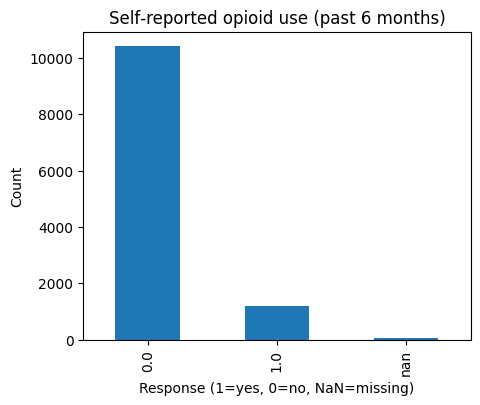

In [6]:

# Select the categorical variable
SR_var = 'su_y_sui__use__rxopi_001'
cat_series = df[SR_var]

# Frequency counts and proportions
counts = cat_series.value_counts(dropna=False)
proportions = cat_series.value_counts(normalize=True, dropna=False)

freq_table = pd.DataFrame({
    'count': counts,
    'proportion': proportions
})
print(freq_table)

# Bar plot
plt.figure(figsize=(5,4))
counts.plot.bar()
plt.title('Self‑reported opioid use (past 6 months)')
plt.xlabel('Response (1=yes, 0=no, NaN=missing)')
plt.ylabel('Count')
savefig("q3_sr_bar")
plt.show()



**Reflection (Ungraded, for Note-Taking)**

- What proportion of participants report opioid use in the past 6 months?  What proportion report no use?  How much missing data is there?
- Based on the bar chart, does this variable look balanced or imbalanced?  How might that influence analyses that use it as a grouping variable?



## 4. Your turn: Univariate EDA — Categorical

Pick one approved categorical variable from the list below and:

- Create a **frequency table** with counts and proportions.
- Make a **bar plot** of the counts.

Treat special codes `999` as missing by replacing them with `np.nan` first (if applicable).

### Approved categorical variables
- `su_y_sui__use__rxopi_001` – Ever used opioids
- `su_y_perc__rxopi_001` – Percieved harm of use
- `su_y_otu__rxopi_001` – Had opportunity to use opioid (1=yes, 0=no)
- `su_y_ptu__rxopi_001` – Friend acceptance of opioid use (0, 1, 2; 999=missing)

### Copilot prompts for further understanding (paste one at a time):
1. “In pandas, how do I get counts and proportions for each category in a Series, including NaN values?”
2. “How do I replace special numeric codes (e.g., 999) with NaN in a pandas Series without altering the original DataFrame?”
3. “Write minimal matplotlib code to make a bar chart from a pandas value_counts() result and label the axes.”

                          count  proportion
su_y_sui__use__rxopi_001                   
0.0                       10411    0.891353
1.0                        1204    0.103082
NaN                          65    0.005565


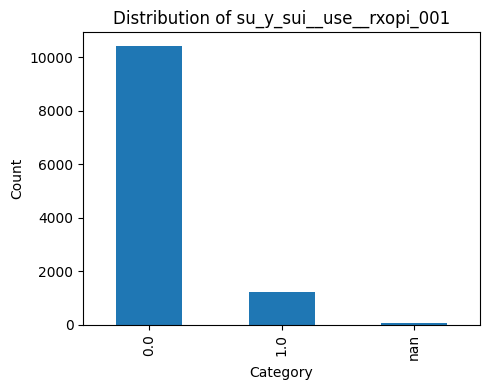

In [7]:
# Select your categorical variable
qual_var = 'su_y_sui__use__rxopi_001'  # TODO: choose from the approved list above
series = df[qual_var].replace({999: np.nan})  # TODO: fill special missing code(s) if applicable

# Frequency counts and proportions
counts = series.value_counts(dropna=False)             # TODO: counts
proportions = series.value_counts(normalize=True, dropna=False)  # TODO: proportions
# Combine into a DataFrame
freq_table = pd.DataFrame({
    'count': counts,
    'proportion': proportions
})
print(freq_table)

# Bar plot
plt.figure(figsize=(5,4))
counts.plot.bar()
plt.title(f'Distribution of {qual_var}')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig(f"bar_{qual_var}.png", dpi=150, bbox_inches="tight")
savefig(f"bar_{qual_var}")
plt.show()     
plt.close()



**Reflection:**

Write a brief interpretation of the distributions you plotted above.

- Does your numeric variable appear symmetric, skewed, or bimodal?  Are there outliers?
- Are the categories of your categorical variable balanced or imbalanced?  Is there a large amount of missing data?

Add your notes here.


## 5. Bivariate EDA: Categorical × Categorical (Demo)

We'll now explore the relationship between two categorical variables.  We'll cross **self‑reported opioid use** in the past 6 months (`su_y_sui__use__rxopi_001`) with the **hair toxicology screen** result (`su_y_hairtox__rslt__opi_scrn`).  Our goal is to see how often the self‑report and the hair toxicology agree or disagree.

The code below creates a contingency table of counts and proportions.  It also calculates the **discordant percent**—the percentage of cases where the self‑report is negative but the hair toxicology is positive.


In [8]:

# Define variables
self_report = 'su_y_sui__use__rxopi_001__l'
hair_screen = 'su_y_hairtox__rslt__opi_scrn'

# Select the two variables
x = df[self_report]
y = df[hair_screen]

# Create contingency table (2×2) with NaN treated as a category
contingency = pd.crosstab(x.fillna('Missing'), y.fillna('Missing'))
print('Contingency table (counts):')
print(contingency)

# Row and column proportions
row_props = contingency.div(contingency.sum(axis=1), axis=0)
col_props = contingency.div(contingency.sum(axis=0), axis=1)

print('Row proportions:')
print(row_props)
print('Column proportions:')
print(col_props)

# Calculate discordant percentage: self‑report = 0 (no use) and hair tox = 1 (positive)
discordant_mask = (x == 0) & (y == 1)
num_discordant = discordant_mask.sum()
total_nonmissing = ((~x.isna()) & (~y.isna())).sum()

discordant_percent = (num_discordant / total_nonmissing) * 100 if total_nonmissing > 0 else np.nan

print(f"Percent of cases with self‑report = 0 and hair tox = 1: {discordant_percent:.2f}%")


Contingency table (counts):
su_y_hairtox__rslt__opi_scrn   0.0  1.0  666.0  Missing
su_y_sui__use__rxopi_001__l                            
0.0                           1903   27      7     9323
1.0                             36  319      0        0
Missing                          7    0      0       58
Row proportions:
su_y_hairtox__rslt__opi_scrn       0.0       1.0     666.0   Missing
su_y_sui__use__rxopi_001__l                                         
0.0                           0.169005  0.002398  0.000622  0.827975
1.0                           0.101408  0.898592  0.000000  0.000000
Missing                       0.107692  0.000000  0.000000  0.892308
Column proportions:
su_y_hairtox__rslt__opi_scrn       0.0       1.0  666.0   Missing
su_y_sui__use__rxopi_001__l                                      
0.0                           0.977903  0.078035    1.0  0.993817
1.0                           0.018499  0.921965    0.0  0.000000
Missing                       0.003597  0.0000

### Understanding the Cross-tabulation Results

The tables above show how self-reported opioid use matches up with the hair toxicology test results.

**What each table tells you:**

1. **Counts table** – Raw numbers showing how many people fall into each category:
   - Rows: What people reported (0 = no use, 1 = used, Missing = no data)
   - Columns: What the hair test showed (0 = no use, 1 = positive, Missing = no data)

2. **Row proportions table** – For each self-report group, what percentage had each test result:
   - Helps you see: "Among people who reported no use, what percentage actually tested positive?"

3. **Column proportions table** – For each test result, what percentage gave each self-report:
   - Helps you see: "Among people who tested positive, what percentage didn't report using?"

**The discordant percentage** is especially important—it tells you how often people deny using opioids but test positive (suggesting they underreported their use).

**Reflection Questions:**

- How often do the self-report and hair toxicology results agree?  Where do they disagree most?
- What does the underreporting rate tell you about accuracy and honesty in self-reported opioid use?

Record your thoughts here.

### Visualizing the contingency table

Tables are powerful, but visualizations can make patterns easier to see.  
Here we’ll add two complementary plots:

1. **Heatmap of counts** – Shows the raw number of cases in each cell of the contingency table.  
   Darker colors indicate larger counts.
2. **Stacked bar chart of row proportions** – Shows the percentage breakdown of hair toxicology results *within* each self-report group.

These plots give both a “how many” perspective (counts) and a “how likely” perspective (proportions).


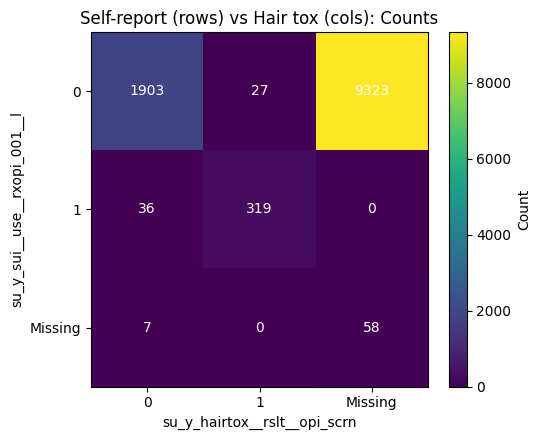

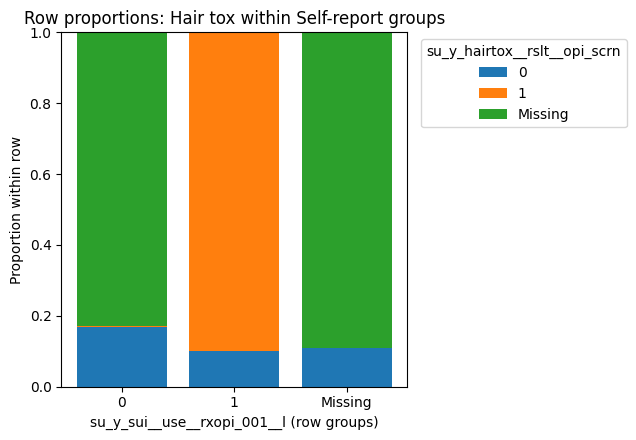

In [9]:
# --- Visualization 1: Heatmap of counts (2x2 + Missing as category) ---
# Ensure a consistent order for categories
cat_order = [0, 1, 'Missing']
cont_viz = pd.crosstab(x.fillna('Missing'), y.fillna('Missing'))\
            .reindex(index=cat_order, columns=cat_order, fill_value=0)

plt.figure(figsize=(5.5, 4.5))
plt.imshow(cont_viz.values, aspect='auto')
plt.title('Self-report (rows) vs Hair tox (cols): Counts')
plt.xlabel(hair_screen)
plt.ylabel(self_report)
plt.xticks(ticks=range(len(cat_order)), labels=cat_order)
plt.yticks(ticks=range(len(cat_order)), labels=cat_order)
cbar = plt.colorbar()
cbar.set_label('Count')

# Annotate cells with values
for i in range(cont_viz.shape[0]):
    for j in range(cont_viz.shape[1]):
        plt.text(j, i, int(cont_viz.values[i, j]),
                 ha='center', va='center', color='white', fontsize=10)
plt.tight_layout()
savefig("q5_heatmap_counts")
plt.show()

# --- Visualization 2: Stacked bar of row proportions ---
row_props_viz = cont_viz.div(cont_viz.sum(axis=1), axis=0).fillna(0)

plt.figure(figsize=(6.5, 4.5))
bottom = np.zeros(row_props_viz.shape[0])
for col in row_props_viz.columns:
    plt.bar(row_props_viz.index.astype(str), row_props_viz[col].values, bottom=bottom, label=str(col))
    bottom += row_props_viz[col].values

plt.title('Row proportions: Hair tox within Self-report groups')
plt.xlabel(f'{self_report} (row groups)')
plt.ylabel('Proportion within row')
plt.legend(title=f'{hair_screen}', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.ylim(0, 1)
plt.tight_layout()
savefig("q5_row_props")
plt.show()

### Interpreting the visualizations

Recall:  
- **Self-report variable (`su_y_sui__use__rxopi_001`)** – Past 6-month opioid use (1 = yes, 0 = no, NaN = missing).  
- **Hair toxicology variable (`su_y_hairtox__rslt__opi_scrn`)** – Positive hair screen for opioids (1 = positive, 0 = negative, NaN = missing).

**Heatmap of counts**  
- Larger numbers along the diagonal (0–0, 1–1) suggest agreement between self-report and hair toxicology.  
- Off-diagonal cells (0–1, 1–0) represent **discordance** — where self-report and hair tox give different answers.

**Stacked bar chart of row proportions**  
- Each bar represents a self-report group (0 = reported no use, 1 = reported use).  
- The colored segments show the proportion of positive vs. negative hair tox results in each group.  
- This proportional view is especially useful when the number of people in each self-report group is very different.

**Tip:** Ask copilot to help you organize the cross-tabs into a clearer format with plainer language, this will help you read and understand the output.



**Reflection:**

Describe any patterns you observe in the contingency table and proportions.  Do the variables appear to be associated?  Are there particular cells where the counts are unexpectedly high or low?


## 6. Your Turn: Categorical × Numeric (Qualitative Variable × Quantitative Variable)

In this activity, you’ll examine how a **numeric** outcome varies across groups of a **categorical** predictor using **side-by-side boxplots**. This is useful for spotting group differences, spread, and outliers.

**Steps you’ll do:**
1. Pick **one categorical** variable and **one numeric** variable from the lists below.
2. Treat nonresponse codes (e.g., `999`) as a separate category for EDA (you’ll clean in Lab 3).
3. Create a grouped summary table (mean/median/n).
4. Plot **side-by-side boxplots**.
5. Jot quick interpretation notes.

**Qual (categorical) options (pick one):**
- `su_y_sui__use__rxopi_001` – Ever used opioids  
- `su_y_perc__rxopi_001` – Perceived harm of use  
- `su_y_otu__rxopi_001` – Had opportunity to use opioid (1=yes, 0=no)  
- `su_y_ptu__rxopi_001` – Friend acceptance of opioid use (0, 1, 2; 999=missing)  

**Quant (numeric) options (pick one):**
- `su_y_drgprob_prsum` – DAPI sum score  
- `su_y_sui__rxopi__onset_useage` – Age at first opioid use  
- `su_y_sui__rxopi__lt_001` – Number of opioid use days (past 6 months)  
- `fc_y_pm_mean` – Parental monitoring (mean)

> ⚠️ Reminder: For this lab, keep `999` as a **category** (“Missing”) for the **categorical** variable. For the **numeric** variable, keep it numeric and drop NaNs.

---

### 🤖 Copilot prompt (paste into a comment)
“Show pandas code to compare a categorical and numeric variable:  
- map `999` to a 'Missing' level for the categorical,  
- compute groupwise n/mean/median,  
- and draw side-by-side boxplots (numeric by category) with clear axis labels.”


Grouped summary (numeric by category):


/tmp/ipykernel_1032/3815104199.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = work.groupby('cat')['num'].agg(n='count', mean='mean', median='median').reset_index()


,cat,n,mean,median
0,0.0,0,NaN,NaN
1,1.0,1204,15.457554,15.456957
2,999,0,NaN,NaN


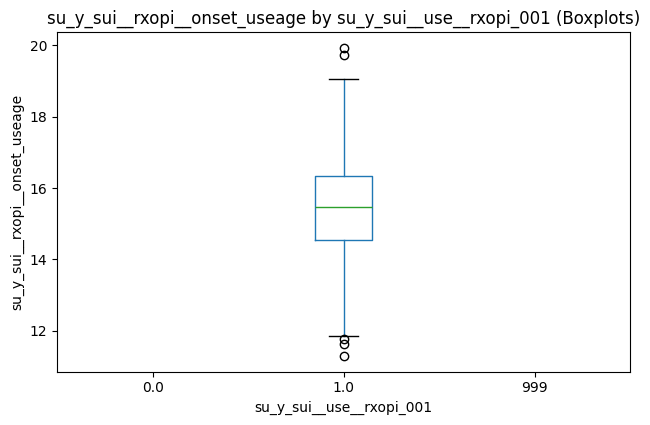

In [10]:
# ====== Your Turn: Qual × Quant  ======

# 1) Choose one categorical and one numeric variable from the lists above
cat_var = 'su_y_sui__use__rxopi_001'    # e.g., 'su_y_ptu__rxopi_001'
num_var = 'su_y_sui__rxopi__onset_useage'    # e.g., 'su_y_drgprob_prsum'

# 2) Configure missing/nonresponse for the categorical variable
MISSING_CODE_CAT = 999        # e.g., 999
MISSING_LABEL    = 'Missing'      # e.g., 'Missing'
# 3) Prepare series
cat_series = df[cat_var].replace(MISSING_CODE_CAT, MISSING_LABEL).fillna('999')  # same label as above
num_series = pd.to_numeric(df[num_var], errors='coerce')  # keep numeric; coerce non-numeric to NaN

# 4) Combine into a working DataFrame
work = pd.DataFrame({
    'cat': cat_series.astype('category'),
    'num': num_series
})

# 5) (Optional) drop rows where numeric is NaN before summaries/plots
drop_na_numeric = ___   # True / False
if drop_na_numeric:
    work = work.dropna(subset=['num'])

# 6) Grouped summary (n, mean, median)
grouped = work.groupby('cat')['num'].agg(n='count', mean='mean', median='median').reset_index()

print("Grouped summary (numeric by category):")
display(grouped)

# 7) Side-by-side boxplots (numeric by category)
fig_w, fig_h = 6.5, 4.5   # e.g., 7, 4

ax = work.boxplot(
    column='num',
    by='cat',
    figsize=(fig_w, fig_h),
    grid=___                 # True/False
)
ax.set_title(f"{num_var} by {cat_var} (Boxplots)")
ax.set_xlabel(cat_var)
ax.set_ylabel(num_var)
plt.suptitle("")            # remove pandas’ automatic super title
plt.xticks(rotation=0)    # e.g., 0 or 45
plt.tight_layout()
savefig(f"q6_box_{num_var}_by_{cat_var}")
plt.show()

### Interpretation Helper

Use the following prompts to guide your interpretation of the boxplots:

- **Plain language:** What does `cat_var` represent, and what do its codes mean?  
  *(e.g., 0 = No, 1 = Yes, 2 = Higher acceptance, 999/Missing = nonresponse)*  
- **Plain language:** What does `num_var` measure (units or scale)?
- **Boxplots:** Compare medians, IQR (box height), and outliers across categories.
- Do certain categories have consistently higher or lower medians?
- Does variability (spread) differ across categories?
- Any potential data quality notes?  
  *(e.g., a "Missing" category with unusual distribution)*
- **Takeaway:** Write one sentence about the possible association you observe.  
  *(Exploratory only; no formal inference at this stage.)*

**Tip:** Ask copilot to help you organize the output and labels on the visualizations into a clearer format with plainer language, this will help you read and understand the output.


## 7. Bivariate EDA: Quantitative × Quantitative (Demo)

Finally we'll explore a relationship between two numeric variables.  We'll create a **peer deviance sum** by adding three Likert‑scaled items (`fc_y_pbp_001`, `fc_y_pbp_002`, and `fc_y_pbp_003`).  Before summing, we replace any special missing codes (777 and 999) with `NaN`.  We then plot the resulting sum against the DAPI sum and compute the **Spearman correlation coefficient**.  Spearman's rho is appropriate here because both variables are discrete and may not be normally distributed.

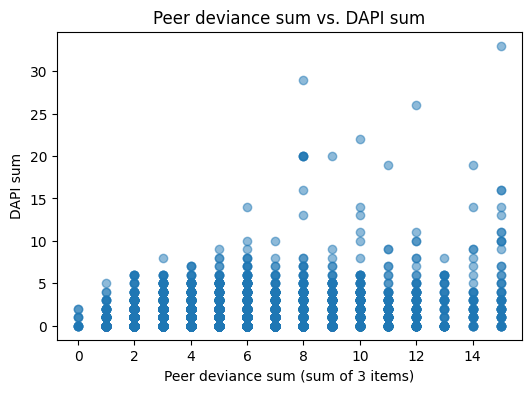

Spearman correlation: 0.272


In [13]:
from scipy.stats import spearmanr

# Replace special codes with NaN for the peer deviance items
peer_items = df[['fc_y_pbp_001', 'fc_y_pbp_002', 'fc_y_pbp_003']].replace({777: np.nan, 999: np.nan})

# Compute peer deviance sum
peer_dev_sum = peer_items.sum(axis=1)

# Extract DAPI sum
dapi = df['su_y_drgprob_prsum']

# Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(peer_dev_sum, dapi, alpha=0.5)
plt.title('Peer deviance sum vs. DAPI sum')
plt.xlabel('Peer deviance sum (sum of 3 items)')
plt.ylabel('DAPI sum')
savefig("q7_scatter_peer_vs_dapi")
plt.show()

# Spearman correlation (drop missing pairs)
mask = (~peer_dev_sum.isna()) & (~dapi.isna())
if mask.sum() > 1:
    rho, pval = spearmanr(peer_dev_sum[mask], dapi[mask])
    print(f"Spearman correlation: {rho:.3f}")
else:
    print("Not enough data to compute Spearman correlation.")


**Reflection:**

- Is there an apparent relationship between the peer deviance sum and the DAPI sum?  Does the scatter plot suggest a positive, negative, or no association?
- How strong is the Spearman correlation coefficient?  Would you consider this a weak, moderate, or strong relationship?

Comment on your observations here.

**Tip:** Ask copilot to help you organize the output and labels on the visualizations into a clearer format with plainer language, this will help you read and understand the output.


## 8. Your Turn: Quantitative × Quantitative (PGD Sum × Second Quantitative Variable)

Now you will repeat the process from the demo, but:
- Create a **Peer Group Deviance (PGD) sum** from `su_y_pgd_001` through `su_y_pgd_008`.
- Replace special missing codes (`777`, `999`) with `NaN` before summing.
- Pick **one** numeric variable from the list below to compare with your PGD sum:
  - `su_y_drgprob_prsum` – DAPI summary
  - `su_y_sui__rxopi__onset_useage` – Age at first opioid use
  - `su_y_sui__rxopi__lt_001` – Number of opioid use days (past 6 months)
  - `fc_y_pm_mean` – Parental monitoring mean
- Create a scatter plot and compute **Spearman’s correlation**.

---

**🤖 Copilot prompt:**
> “Replace special codes (777, 999) with NaN for 8 PGD items, sum them, plot against a chosen numeric variable with scatter plot, and compute Spearman correlation (pandas + matplotlib + scipy).”
> “Check my labels: rewrite them in plainer language so a non-technical reader understands them immediately.”


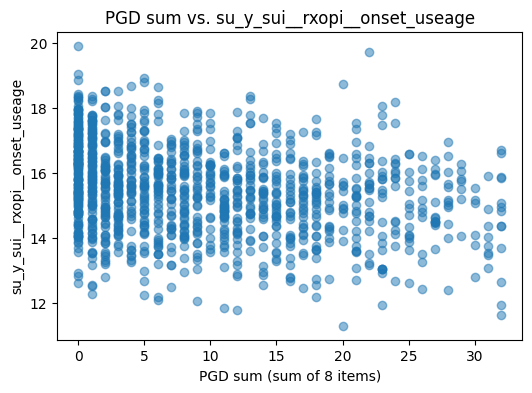

Spearman correlation: -0.275


In [16]:
from scipy.stats import spearmanr

# 1) Replace special codes with NaN for the PGD items
pgd_items = df[['su_y_pgd_001', 'su_y_pgd_002', 'su_y_pgd_003', 'su_y_pgd_004', 'su_y_pgd_005', 'su_y_pgd_006', 'su_y_pgd_007', 'su_y_pgd_008']] \
    .replace({777: np.nan, 999: np.nan})  # e.g., 777, 999

# 2) Compute PGD sum
pgd_sum = pgd_items.sum(axis=1)

# 3) Extract the second numeric variable
num2_var = 'su_y_sui__rxopi__onset_useage'  # e.g., 'su_y_drgprob_prsum'
num2 = df[num2_var]

# 4) Scatter plot
plt.figure(figsize=(6,4))
plt.scatter(pgd_sum, num2, alpha=0.5)  # e.g., 0.5
plt.title(f"PGD sum vs. {num2_var}")
plt.xlabel("PGD sum (sum of 8 items)")
plt.ylabel(num2_var)
savefig(f"q8_scatter_pgd_vs_{num2_var}")
plt.show()

# 5) Spearman correlation (drop missing pairs)
mask = (~pgd_sum.isna()) & (~num2.isna())
if mask.sum() > 1:
    rho, pval = spearmanr(pgd_sum[mask], num2[mask])
    print(f"Spearman correlation: {rho:.3f}")
else:
    print("Not enough data to compute Spearman correlation.")

### Interpretation Helper

- **PGD sum meaning:** What does a high PGD score indicate? What’s the possible range?
- **Second variable meaning:** What does your chosen numeric variable measure?
- **Pattern:** Does the scatter plot suggest a positive, negative, or no association?
- **Strength:** Is Spearman’s rho close to 0, moderate (0.3–0.5), or high (>0.5)?
- **Missing data:** Were many pairs dropped? Could this affect your conclusions?
- **One-sentence takeaway:** Summarize the observed association in plain language.

**Tip:** Ask copilot to help you organize the output and labels on the visualizations into a clearer format with plainer language, this will help you read and understand the output.


# Lab 2 — Autograder Checklist & Grade Rubric *(Dataset-Free)* (**50 pts**)

This autograder **does not execute your notebook or require any dataset**. It parses `Lab2.ipynb` and checks for **variable names, assignments, and code patterns**. Keep the **exact names** and show the required **expressions** in code cells.

---

## ✅ What you must include (names & patterns must match)

**You may choose any valid columns**, but your code must define the items below exactly as named.

### Univariate — Numeric
- `quant_var` — a **string** set to an approved numeric column name (shown in the notebook).
- `series` — created from `df[quant_var]` with special codes replaced:  
  `series = df[quant_var].replace({777: np.nan, 999: np.nan})`
- Scalars defined **from `series`**:  
  `mean`, `median`, `q1`, `q3`, `iqr` (`q3 - q1`), `pct_missing`, `min_val`, `max_val`  
  - `pct_missing` must appear as: `series.isna().mean() * 100`
- Figure-save lines (filenames must match):  
  `plt.savefig(f"hist_{quant_var}.png", ...)` and `plt.savefig(f"box_{quant_var}.png", ...)`

### Univariate — Categorical
- `qual_var` — a **string** set to an approved categorical column name.
- `series` — built from `df[qual_var]` (OK to reuse the name) and, if applicable, replace special codes (e.g., `{999: np.nan}`).
- Counts & proportions **with required options**:
  - `counts = series.value_counts(dropna=False)`
  - `proportions = series.value_counts(normalize=True, dropna=False)`
- `freq_table` — a DataFrame with **columns** `count` and `proportion` created from `counts` and `proportions`.
- Figure-save line:  
  `plt.savefig(f"bar_{qual_var}.png", ...)`

### Bivariate — Names only (syntax check)
- `cat_var` — from the approved categorical list.
- `num_var` — from the approved quantitative list.
- `num2_var` — from the approved quantitative list.

> You **do not upload images**. The autograder just verifies your code contains the correct `savefig(...)` calls and required variable definitions.

---

## 🧪 Grade Rubric (how points are earned)

### 1) Smoke & Structure (**5 pts**)
- **2 pts** — No unfinished placeholders: `____`, `TODO`, `pass  # TODO`.
- **3 pts** — Notebook shows the standard imports (e.g., `import pandas as pd`) **and** assigns a variable named `df` (e.g., a `pd.read_csv(...)` into `df`).

### 2) Numeric Summary (**12.5 pts**)
- **3 pts** — `quant_var` set to an approved name **and** `series = df[quant_var].replace({777: np.nan, 999: np.nan})` appears.
- **4 pts** — `mean`, `median`, `min_val`, `max_val` are computed from `series` (e.g., `series.mean()`, `series.median()`, `series.min()`, `series.max()`).
- **3 pts** — `q1 = series.quantile(0.25)`, `q3 = series.quantile(0.75)`, and `iqr = q3 - q1`.
- **2.5 pts** — `pct_missing` appears exactly as `series.isna().mean() * 100`.

### 3) Categorical Frequencies (**12.5 pts**)
- **3 pts** — `qual_var` set to an approved name; if needed, special-code replacement shown.
- **6 pts** — `counts = series.value_counts(dropna=False)` **and** `freq_table` includes a `count` column built from `counts`.
- **3.5 pts** — `proportions = series.value_counts(normalize=True, dropna=False)` **and** `freq_table` includes a `proportion` column built from `proportions`.

### 4) Figure Save Calls (**10 pts**)
- **3 pts** — Code includes `plt.savefig(f"hist_{quant_var}.png", ...)`.
- **3 pts** — Code includes `plt.savefig(f"box_{quant_var}.png", ...)`.
- **4 pts** — Code includes `plt.savefig(f"bar_{qual_var}.png", ...)`.

### 5) Bivariate Variable Selection (syntax only) (**10 pts**)
- **3 pts** — `cat_var` is from the approved categorical list.
- **3 pts** — `num_var` is from the approved quantitative list.
- **4 pts** — `num2_var` is from the approved quantitative list.

**Total = 50 pts**

---

## ☑️ Quick Pre-Submission Checklist

- [ ] I set `quant_var` and `qual_var` to approved column names.
- [ ] I defined **all** required scalars from `series`: `mean`, `median`, `q1`, `q3`, `iqr`, `pct_missing`, `min_val`, `max_val`.
- [ ] My `pct_missing` line is exactly `series.isna().mean() * 100`.
- [ ] I created `counts`, `proportions` with `dropna=False` and built `freq_table` with `count` and `proportion`.
- [ ] I included these save lines:  
  `hist_{quant_var}.png`, `box_{quant_var}.png`, `bar_{qual_var}.png`.
- [ ] I set `cat_var`, `num_var`, `num2_var` from the approved lists.
- [ ] I removed all placeholders and kept required names.
- [ ] The notebook opens without errors and contains the expected imports and `df = ...` assignment.

---

## 🔎 Common Pitfalls

- Hiding errors with `try/except`.
- Renaming or omitting required variables/filenames.
- Missing `dropna=False` or `normalize=True` in `value_counts(...)`.
- Not showing the exact `pct_missing` expression.
- Using different `savefig` filenames or leaving out the calls.

---

## 📤 Submission

Upload **only** `Lab2.ipynb` to Gradescope. The autograder reads your notebook and checks for the required names and code patterns—**no dataset needed**.
